<a href="https://colab.research.google.com/github/clementmariebrisson/bitcoin-cash-challenge/blob/main/amount_of_transactions_by_date.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# CONNECTION TO PROJECT
client = bigquery.Client(project='bitcoin-cash-challenge', location='US')
auth.authenticate_user()

In [39]:
# INPUTS BALANCE  BY DATE
query_inputs = """
        SELECT
          SUM(input_balance) as sum_input_balance,
          block_date
        FROM `bitcoin-cash-challenge.dbt_cmariebrisson.DTM_bitcoin_cash_transactions_3M`
        GROUP by block_date
        ORDER by block_date
        """
query_inputs_job = client.query(query_inputs)
results_inputs = query_inputs_job.result()

df_inputs = pd.DataFrame(results_inputs.to_dataframe())
df_inputs.head(5)

,sum_input_balance,block_date
0,18379356789122842.000000000,2022-11-22
1,21221412698587378.000000000,2022-11-23
2,11152571493985998.000000000,2022-11-24
3,15094072966412919.000000000,2022-11-25
4,18945039951730675.000000000,2022-11-26


In [28]:
# OUTPUTS BALANCE BY DATE
query_outputs = """
        SELECT
          SUM(output_balance) as sum_output_balance,
          block_date
        FROM `bitcoin-cash-challenge.dbt_cmariebrisson.DTM_bitcoin_cash_transactions_3M`
        GROUP by block_date
        ORDER by block_date
        """
query_outputs_job = client.query(query_outputs)
results_outputs = query_outputs_job.result()

df_outputs = pd.DataFrame(results_outputs.to_dataframe())
df_outputs.head(5)

,sum_output_balance,block_date
0,18379336836022539.000000000,2022-11-22
1,21221398850979933.000000000,2022-11-23
2,11152558542739491.000000000,2022-11-24
3,15094052720967289.000000000,2022-11-25
4,18945025587441965.000000000,2022-11-26


In [30]:
# BALANCE BY DATE
query = """
        SELECT
          SUM(input_balance - output_balance) as sum_balance,
          block_date
        FROM `bitcoin-cash-challenge.dbt_cmariebrisson.DTM_bitcoin_cash_transactions_3M`
        GROUP by block_date
        ORDER by block_date
        """
query_job = client.query(query)
results = query_job.result()

df = pd.DataFrame(results.to_dataframe())
df.head(5)

,sum_balance,block_date
0,19953100303.000000000,2022-11-22
1,13847607445.000000000,2022-11-23
2,12951246507.000000000,2022-11-24
3,20245445630.000000000,2022-11-25
4,14364288710.000000000,2022-11-26


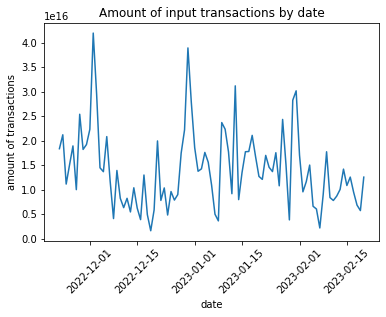

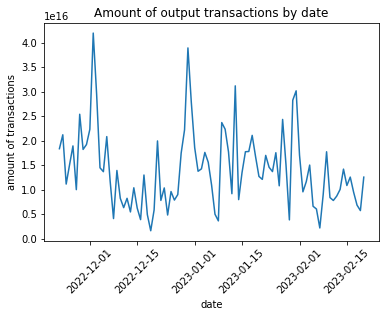

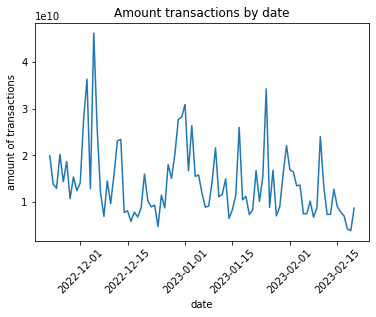

In [35]:
# BALANCE INPUTS DATAFRAME
  # Plot the dataframe as a line plot
plt.plot(df_inputs['block_date'], df_inputs['sum_input_balance'])
  # Set the x-axis and y-axis labels
plt.ylabel('amount of transactions')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title('Amount of input transactions by date')
  # Show the plot
plt.show()


# BALANCE OUTPUTS DATAFRAME
  # Plot the dataframe as a line plot
plt.plot(df_outputs['block_date'], df_outputs['sum_output_balance'])
  # Set the x-axis and y-axis labels
plt.ylabel('amount of transactions')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title('Amount of output transactions by date')
  # Show the plot
plt.show()


# BALANCE DATAFRAME
  # Plot the dataframe as a line plot
plt.plot(df['block_date'], df['sum_balance'])
  # Set the x-axis and y-axis labels
plt.ylabel('amount of transactions')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title('Amount transactions by date')
  # Show the plot
plt.show()
